# One-shot learning (N-way) using Omniglot data set and Siamese Neural Networks

This notebook shows an implementation version of the paper [koch et al, Siamese Neural Networks for One-shot Image Recognition](http://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf).

The model has been created with [keras](https://keras.io/).

## One-shot learning (N-way)

Humans learn new concepts with very little supervision – e.g. a child can generalize the concept
of “giraffe” from a single picture in a book.

Deep learning has made major advances in areas such as speech, vision and language, but is notorious for requiring large datasets.

The process of learning good features for machine learning applications can be very computationally expensive and may prove difficult in cases where little data is available.

One-shot learning is a clasification problem in machine learning, that aims to learn information about classes from one, or only a few, training examples.

An one-shot task aims to classify a test example, X, into one the N unique classes (N-ways) of a support set S which is a representation of the available C classes.

The model is given the support set and it is also given a test example that has to classify.

Since exactly one example in the support set has the right class of the test example, the aim is to correctly predict which support example is the same as the test example.

## Omniglot data set

The data set contains 50 alphabets total, splitted into a background set of 30 alphabets and an evaluation set of 20 alphabets. There is no overlap between the training and test data sets.

Each alphabet has a number of characters from 14 to 55 different characters drawn by 20 different subjects, resulting in 20 105x105 images for each character with a total of 1623 character classes.

The background set is only used to learn general knowledge about characters (e.g., hyperparameter inference or feature learning). One-shot learning results are reported using alphabets from the evaluation set.

![alt text](./images/omniglot_general.png "Omniglot Data Set")

Following are some of the alphabets represented in the data set:

![alt text](./images/omniglot_alphabets.png "Omniglot Alphabets")

An example of a 20-way one-shot task in this dataset can be seen in the following figure:
    
![alt text](./images/omniglot_20_way.png "Omniglot 20-way task")

### Omniglot Service

The data set is retrieved using OmniglotService class.

It download and unzip the data set to the path specified when creating the class (./data by default) within the train_set and test_set folders respectively.

In [1]:
from omniglot_service import OmniglotService

data_service = OmniglotService()
data_service.get_data()

Unziping data/images_background.zip to data
Rename data/images_background to data/train_set
Unziping data/images_evaluation.zip to data
Rename data/images_evaluation to data/test_set


You can also retrieve the data by set type (train/test) and specify the folder name where will be unzip.

In [2]:
data_service.get_data_type('test_alphabets', data_type='test')

Unziping data/images_evaluation.zip to data
Rename data/images_evaluation to data/test_alphabets


Data folder content after getting the data:

In [3]:
!ls ./data

test_alphabets test_set       train_set


Below there is a summary of the folders content:

In [4]:
print("Train Set:")
number_alphabets = !ls ./data/train_set | wc -l
print(f'Number of alphabets = {number_alphabets[0]}')
alphabets = !ls ./data/train_set | head -5
print(f'First five alphabets = {alphabets}')
classes = !ls ./data/train_set/Alphabet_of_the_Magi | head -5
print(f'First five classes of first alphabet = {classes}')
images = !ls ./data/train_set/Alphabet_of_the_Magi/character01 | head -5
print(f'First five images of first character of first alphabet = {images}')
print()
print("Test Set:")
number_alphabets = !ls ./data/test_set | wc -l
print(f'Number of alphabets  = {number_alphabets[0]}')
alphabets = !ls ./data/test_set | head -5
print(f'First five alphabets = {alphabets}')
classes = !ls ./data/test_set/Angelic | head -5
print(f'First five classes of first alphabet = {classes}')
images = !ls ./data/test_set/Angelic/character01 | head -5
print(f'First five images of first character of first alphabet = {images}')

Train Set:
Number of alphabets =       30
First five alphabets = ['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)']
First five classes of first alphabet = ['character01', 'character02', 'character03', 'character04', 'character05']
First five images of first character of first alphabet = ['0709_01.png', '0709_02.png', '0709_03.png', '0709_04.png', '0709_05.png']

Test Set:
Number of alphabets  =       20
First five alphabets = ['Angelic', 'Atemayar_Qelisayer', 'Atlantean', 'Aurek-Besh', 'Avesta']
First five classes of first alphabet = ['character01', 'character02', 'character03', 'character04', 'character05']
First five images of first character of first alphabet = ['0965_01.png', '0965_02.png', '0965_03.png', '0965_04.png', '0965_05.png']


### Omniglot Loader

The data set is loaded into memory from the specified data set types folders using OmniglotLoader class.

If any of the folders doesn't exist the loader uses the OmniglotService to retrieve de data set.

Each data set type is stored in a tuple respectively with the first element being the data and the second the classes in the format 'alphabet/character' and saved to a pickle file to load it more quickly in subsequents loads.

In [5]:
from omniglot_loader import OmniglotLoader

omniglot_loader = OmniglotLoader(path='./data', train_folder='train_set', test_folder='test_set')
train_set, test_set = omniglot_loader.load_data()

Loading data from data/train_set
Saving data to data/train.pickle
Loading data from data/test_set
Saving data to data/test.pickle


In [6]:
train_set, test_set = omniglot_loader.load_data()

Loading data from data/train.pickle
Loading data from data/test.pickle


Below there is a summary of the tuple's content:

In [7]:
print("Train Set:")
classes, images_per_class, height, width, channels = train_set[0].shape
print(f'Number of classes = {classes}')
print(f'Images per class  = {images_per_class}')
print(f'Image shape (H,W,C) = {height}, {width}, {channels}')
print(f'First five classes = {train_set[1][0:5]}')
print()
print("Test Set:")
classes, images_per_class, height, width, channels = test_set[0].shape
print(f'Number of classes = {classes}')
print(f'Images per class  = {images_per_class}')
print(f'Image shape (H,W,C) = {height}, {width}, {channels}')
print(f'First five classes = {test_set[1][0:5]}')
print()
common_classes = set(train_set[1])&set(test_set[1])
print(f'Number of classes in both data sets = {len(common_classes)}')

Train Set:
Number of classes = 964
Images per class  = 20
Image shape (H,W,C) = 105, 105, 1
First five classes = ['Alphabet_of_the_Magi/character01', 'Alphabet_of_the_Magi/character02', 'Alphabet_of_the_Magi/character03', 'Alphabet_of_the_Magi/character04', 'Alphabet_of_the_Magi/character05']

Test Set:
Number of classes = 659
Images per class  = 20
Image shape (H,W,C) = 105, 105, 1
First five classes = ['Angelic/character01', 'Angelic/character02', 'Angelic/character03', 'Angelic/character04', 'Angelic/character05']

Number of classes in both data sets = 0


Following is a random sample of each data set:

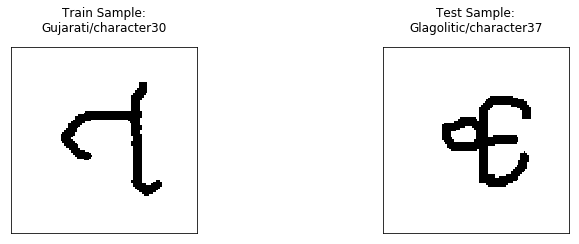

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

train_sample = np.random.randint(len(train_set[1]))
test_sample = np.random.randint(len(test_set[1]))
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.matshow(train_set[0][train_sample][0].reshape(height, width), cmap='gray')
ax2.matshow(test_set[0][test_sample][0].reshape(height, width), cmap='gray')
ax1.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.set_title(f'Train Sample:\n{train_set[1][train_sample]}')
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.set_title(f'Test Sample:\n{test_set[1][test_sample]}')
plt.subplots_adjust(wspace=1)
plt.show()